In [1]:
import numpy as np
import pandas as pd
import os

## Funções e Configurações

In [2]:
# this dictionary contains the configuration necessary to divide each dataset used in the work, the script is made
# for the conll type of datasets, so if you want to add datasets to divide, make sure to add it here
gen_config = {
    'leNER':{
        'base_dir': "../Base de Dados/leNER/",
        'load_dir': "documents/allDoc/",
        'save_dir': "divisions/iterative/",
        'col_sep' : ' ',
        'file_type': '.conll',
    },
    'UlyssesNER-BR':{
        'base_dir': "../Base de Dados/UlyssesNER-BR/",
        'load_dir': "PL_Corpus_byTypes_conll/",
        'save_dir': "divisions/iterative/",
        'col_sep' : ' ',
        'file_type': '.conll',
    },
    'Harem-second':{
        'base_dir': "../Base de Dados/HAREM/",
        'load_dir': "SecondHarem/",
        'save_dir': "divisions/second/iterative/",
        'col_sep' : '\t',
        'file_type': '.conll',
    }
}

In [3]:
def get_sentencas(corpus, coll_sep):
        sentenca = []
        for line in corpus:
            if line == '\n':
                if sentenca:
                    yield sentenca
                    sentenca = []
            else:
                
                sentenca.append(line.strip('\n').split(coll_sep))
        if sentenca:
            yield sentenca

In [4]:
def read_dataset(filepath,coll_sep):
    data_por_sentenca = []
    with open(filepath, "r") as corpus:
        data_por_sentenca += list(get_sentencas(corpus,coll_sep))
    
    return data_por_sentenca

In [5]:
def get_data(config, selective = False, fileName = ""):
    load_dir = config['base_dir'] + config['load_dir']
    sep = config['col_sep']
    if selective:
        fp = load_dir + fileName
        return read_dataset(filepath=fp, coll_sep=sep)
    else:
        filepaths = []
        for file in os.listdir(load_dir):
            if file.endswith(config['file_type']):
                filepaths.append(load_dir + file)
        
        data_por_sentenca = []
        for filepath in filepaths:
            print(filepath+"\n")
            data_por_sentenca += read_dataset(filepath=filepath, coll_sep=sep)
        
        return data_por_sentenca

In [6]:
def split_token_label(data):
    return list(map(list,zip(*data)))

## Carregando DataSet e preparando dados

In [7]:
dataset = 'leNER'
# dataset = 'Paramopama'
# dataset = 'Harem-mini'
# dataset = 'Harem-second'
# dataset = 'UlyssesNER-BR'

config = gen_config[dataset]

filepaths = []

files = os.listdir(config['base_dir'] + config['load_dir'])
print(files)
for file in files:
    # if file.endswith('.conll'):
    filepaths.append(config['base_dir'] + config['load_dir'] + file)

# data_por_sentenca = get_data(config=config)

# data_por_sentenca = get_data(config=config, selective=True, fileName='corpus_Paramopama.txt')
# data_por_sentenca = get_data(config=config, selective=True, fileName='haremMini-total.colnn')
# data_por_sentenca = get_data(config=config, selective=True, fileName='primeiroHAREM-total.colnn')
data_por_sentenca_por_doc = {}
for filepath, file in zip(filepaths, files):
    data_por_sentenca_por_doc[file] = read_dataset(filepath, coll_sep=config['col_sep'])

total_documentos = len(data_por_sentenca_por_doc)
print("Total de documentos carregados:", total_documentos)


['TSTRR16037920105200001.conll', 'RR942006420095040028.conll', 'AgCr10582160008758001.conll', 'HC04798525420128130000.conll', 'HC70000692720177000000.conll', 'Lei11788.conll', 'AgAIRR11889820145030011.conll', 'ADI1TJDFT.conll', 'AgRgTSE3.conll', 'AC10024133855890001.conll', 'AIAgRAgI6193ARAGUARIMG.conll', 'CP32320177080008PA.conll', 'AP771420167080008PA.conll', 'ERR731004520105130003.conll', 'HC418951PR.conll', 'TCU4687.conll', 'AP00001415620157010201.conll', 'AC1TJMG.conll', 'HC110260SP.conll', 'EDRR1TST.conll', 'Pet128TSE5.conll', 'ED1STM.conll', 'DespSEPLAGDF.conll', 'LoaDF2018.conll', '20150110436469APC.conll', 'ED1TJAC.conll', 'AgRg1STM.conll', 'RR2574407120025020372.conll', 'ACORDAOTCU25052016.conll', 'Agr10540170008341001.conll', 'AP00000794920137060006.conll', 'Rcl3495STJ.conll', 'AIRR581406820065030079.conll', 'AgRgTSE1.conll', 'EDEDARR208420135040232.conll', 'AIRR285001420095060020.conll', 'AgAIRR617420125150072.conll', 'Ag10105170208398001.conll', 'HC10000150589281000.conll'

In [8]:
# data_por_sentenca_por_doc['HAREMdoc_aa64686'][0]
# len(data_por_sentenca_por_doc['HAREMdoc_aa64686'])
# data_por_sentenca_por_doc[list(data_por_sentenca_por_doc.keys())[0]]
# d = list(data_por_sentenca_por_doc.values())[0][10][-1]
# list(map(list,zip(d)))
# # d

In [9]:
from collections import Counter
labels_por_doc = {}

for docName, docData in data_por_sentenca_por_doc.items():
    allDocData = []
    
    for sentence in docData:
        allDocData += [i for i in sentence]
    
    docTokens, docLabels = split_token_label(allDocData)
    
    
    labels_por_doc[docName] = docLabels

    labels_count = Counter(docLabels)
    
    # Armazenar a contagem de rótulos para o documento atual
    labels_por_doc[docName] = dict(labels_count)

# Exibir as contagens de rótulos por documento
for doc, labels_count in labels_por_doc.items():
    print(f"Documento: {doc}")
    print("Contagem de rótulos:", labels_count)
    print()

Documento: TSTRR16037920105200001.conll
Contagem de rótulos: {'O': 13616, 'B-ORGANIZACAO': 63, 'I-ORGANIZACAO': 85, 'B-LEGISLACAO': 158, 'I-LEGISLACAO': 731, 'B-JURISPRUDENCIA': 52, 'I-JURISPRUDENCIA': 211, 'B-PESSOA': 36, 'I-PESSOA': 80, 'B-TEMPO': 74, 'I-TEMPO': 28, 'B-LOCAL': 3, 'I-LOCAL': 2}

Documento: RR942006420095040028.conll
Contagem de rótulos: {'O': 4766, 'B-ORGANIZACAO': 41, 'I-ORGANIZACAO': 40, 'B-JURISPRUDENCIA': 23, 'I-JURISPRUDENCIA': 90, 'B-PESSOA': 2, 'I-PESSOA': 4, 'B-TEMPO': 5, 'B-LEGISLACAO': 48, 'I-LEGISLACAO': 282, 'I-TEMPO': 6, 'B-LOCAL': 1}

Documento: AgCr10582160008758001.conll
Contagem de rótulos: {'O': 2521, 'B-LEGISLACAO': 28, 'I-LEGISLACAO': 132, 'B-JURISPRUDENCIA': 6, 'I-JURISPRUDENCIA': 22, 'B-LOCAL': 3, 'I-LOCAL': 13, 'B-ORGANIZACAO': 12, 'I-ORGANIZACAO': 41, 'B-PESSOA': 19, 'I-PESSOA': 42, 'B-TEMPO': 9}

Documento: HC04798525420128130000.conll
Contagem de rótulos: {'O': 3338, 'B-LEGISLACAO': 24, 'I-LEGISLACAO': 143, 'B-TEMPO': 6, 'B-PESSOA': 52, 'B-OR

In [10]:
# labels_por_doc['HAREMdoc_aa64686'][-12]
# len(labels_por_doc['HAREMdoc_aa64686'])

In [11]:
from collections import Counter

# Inicializar um dicionário para armazenar contagens de rótulos por documento
# antes e depois de simplificar.
labels_por_doc = {}
labels_por_doc_simplificado = {}

for docName, docData in data_por_sentenca_por_doc.items():
    allDocData = []
    
    # Concatenar todas as sentenças de um documento em uma lista
    for sentence in docData:
        allDocData += [i for i in sentence]
    
    # Separar tokens e rótulos
    docTokens, docLabels = split_token_label(allDocData)
    
    # Contagem de rótulos com os prefixos (original)
    labels_count_original = Counter(docLabels)
    labels_por_doc[docName] = dict(labels_count_original)
    
    # Extração da última parte do rótulo (ex. 'B-PER' vira 'PER')
    labels_simplificados = [lbl.split('-')[-1] for lbl in docLabels]
    labels_count_simplificado = Counter(labels_simplificados)
    labels_por_doc_simplificado[docName] = dict(labels_count_simplificado)

# Exibir a contagem original e simplificada para comparação
for doc in labels_por_doc.keys():
    print(f"Documento: {doc}")
    print("Contagem de rótulos (original):", labels_por_doc[doc])
    print("Contagem de rótulos (simplificado):", labels_por_doc_simplificado[doc])
    print()

# Exibir o total de documentos
print("Total de documentos:", len(labels_por_doc))



Documento: TSTRR16037920105200001.conll
Contagem de rótulos (original): {'O': 13616, 'B-ORGANIZACAO': 63, 'I-ORGANIZACAO': 85, 'B-LEGISLACAO': 158, 'I-LEGISLACAO': 731, 'B-JURISPRUDENCIA': 52, 'I-JURISPRUDENCIA': 211, 'B-PESSOA': 36, 'I-PESSOA': 80, 'B-TEMPO': 74, 'I-TEMPO': 28, 'B-LOCAL': 3, 'I-LOCAL': 2}
Contagem de rótulos (simplificado): {'O': 13616, 'ORGANIZACAO': 148, 'LEGISLACAO': 889, 'JURISPRUDENCIA': 263, 'PESSOA': 116, 'TEMPO': 102, 'LOCAL': 5}

Documento: RR942006420095040028.conll
Contagem de rótulos (original): {'O': 4766, 'B-ORGANIZACAO': 41, 'I-ORGANIZACAO': 40, 'B-JURISPRUDENCIA': 23, 'I-JURISPRUDENCIA': 90, 'B-PESSOA': 2, 'I-PESSOA': 4, 'B-TEMPO': 5, 'B-LEGISLACAO': 48, 'I-LEGISLACAO': 282, 'I-TEMPO': 6, 'B-LOCAL': 1}
Contagem de rótulos (simplificado): {'O': 4766, 'ORGANIZACAO': 81, 'JURISPRUDENCIA': 113, 'PESSOA': 6, 'TEMPO': 11, 'LEGISLACAO': 330, 'LOCAL': 1}

Documento: AgCr10582160008758001.conll
Contagem de rótulos (original): {'O': 2521, 'B-LEGISLACAO': 28, 'I-

In [12]:
# labels_por_doc['HAREMdoc_aa64686'][-12]
# len(labels_por_doc['HAREMdoc_aa64686'])

In [13]:
lbl_list = []
for lbl in labels_por_doc.values():
    lbl_list.extend(lbl)  # Adiciona os rótulos de cada documento à lista

# Obtendo os rótulos únicos
unique_lbl_list = list(set(lbl_list))

# Exibindo a lista de rótulos únicos
print(unique_lbl_list)




['I-TEMPO', 'B-LOCAL', 'B-ORGANIZACAO', 'I-LOCAL', 'B-PESSOA', 'B-JURISPRUDENCIA', 'B-TEMPO', 'B-LEGISLACAO', 'I-PESSOA', 'I-LEGISLACAO', 'O', 'I-JURISPRUDENCIA', 'I-ORGANIZACAO']


In [14]:
unique_lbl_list.pop(unique_lbl_list.index('O'))
unique_lbl_list

['I-TEMPO',
 'B-LOCAL',
 'B-ORGANIZACAO',
 'I-LOCAL',
 'B-PESSOA',
 'B-JURISPRUDENCIA',
 'B-TEMPO',
 'B-LEGISLACAO',
 'I-PESSOA',
 'I-LEGISLACAO',
 'I-JURISPRUDENCIA',
 'I-ORGANIZACAO']

In [15]:
unique_lbl_list = sorted(unique_lbl_list)
unique_lbl_list

['B-JURISPRUDENCIA',
 'B-LEGISLACAO',
 'B-LOCAL',
 'B-ORGANIZACAO',
 'B-PESSOA',
 'B-TEMPO',
 'I-JURISPRUDENCIA',
 'I-LEGISLACAO',
 'I-LOCAL',
 'I-ORGANIZACAO',
 'I-PESSOA',
 'I-TEMPO']

In [16]:
#test_l = ['LOCAL', 'ORGANIZACAO', 'PESSOA', 'TEMPO', 'LOCAL', 'ORGANIZACAO', 'PESSOA', 'TEMPO', 'LOCAL', 'ORGANIZACAO', 'PESSOA', 'TEMPO', 'TEMPO', 'TEMPO']
#[test_l.count(x) for x in unique_lbl_list]

In [17]:
from collections import Counter

initial_set = []
for s_idx, s_labels in enumerate(list(labels_por_doc.values())):
    # Contagem eficiente dos rótulos usando Counter
    label_count = Counter(s_labels)
    
    # Adicionando o índice do documento e as contagens para cada rótulo em unique_lbl_list
    initial_set.append([s_idx] + [label_count.get(x, 0) for x in unique_lbl_list])

# Verificando o tamanho de initial_set (número de documentos)
print(len(initial_set))


70


In [18]:
# initial_set[:, 1:]

In [19]:
# Adicionando a linha final com os totais de cada label (soma dos rótulos)
initial_set.append(['-'] + [sum(x) for x in zip(*(row[1:] for row in initial_set))])

# Agora vamos filtrar a matriz para manter apenas as 7 primeiras colunas
# (assumindo que as 7 primeiras colunas correspondem aos rótulos -B)
filtered_initial_set = []

for row in initial_set:
    # Mantendo apenas as 7 primeiras colunas (a primeira coluna é '-')
    filtered_row = row[:7]  # Considerando que as primeiras 7 colunas são os rótulos -B
    filtered_initial_set.append(filtered_row)

# Exibindo a matriz resultante filtrada
for row in filtered_initial_set:
    print(row)


[0, 52, 158, 3, 63, 36, 74]
[1, 23, 48, 1, 41, 2, 5]
[2, 6, 28, 3, 12, 19, 9]
[3, 3, 24, 4, 19, 52, 6]
[4, 4, 17, 8, 20, 22, 23]
[5, 0, 17, 1, 5, 3, 15]
[6, 7, 33, 1, 11, 5, 5]
[7, 79, 124, 62, 168, 113, 56]
[8, 29, 35, 2, 46, 30, 37]
[9, 13, 10, 1, 69, 22, 18]
[10, 34, 8, 3, 16, 36, 29]
[11, 18, 29, 1, 58, 30, 18]
[12, 1, 10, 4, 15, 26, 32]
[13, 11, 136, 5, 28, 7, 37]
[14, 12, 3, 2, 17, 18, 8]
[15, 3, 41, 46, 69, 37, 25]
[16, 5, 12, 30, 21, 49, 24]
[17, 19, 40, 1, 9, 14, 16]
[18, 63, 117, 11, 232, 96, 60]
[19, 6, 7, 1, 9, 2, 5]
[20, 18, 8, 3, 28, 16, 20]
[21, 8, 18, 6, 42, 38, 30]
[22, 15, 44, 4, 35, 25, 53]
[23, 0, 12, 4, 12, 1, 7]
[24, 8, 11, 1, 10, 13, 10]
[25, 58, 29, 67, 52, 26, 23]
[26, 6, 9, 1, 24, 19, 20]
[27, 15, 79, 1, 10, 6, 6]
[28, 39, 30, 5, 134, 45, 12]
[29, 2, 8, 3, 9, 7, 11]
[30, 5, 17, 12, 68, 48, 76]
[31, 14, 10, 1, 55, 65, 16]
[32, 8, 18, 1, 10, 8, 5]
[33, 17, 7, 13, 32, 33, 7]
[34, 4, 21, 1, 5, 2, 2]
[35, 2, 17, 2, 11, 3, 4]
[36, 20, 25, 1, 29, 8, 16]
[37, 3, 9, 1,

In [20]:
# list(labels_por_doc.keys())

In [21]:
#initial_set[-1] = initial_set[-1][:7]  # Isso mantém as 7 primeiras colunas, incluindo '-'

# Exibindo a última linha após a atualização
print(filtered_initial_set[-1])


['-', 1496, 2695, 767, 3462, 2068, 1760]


In [22]:
len(filtered_initial_set)

71

In [23]:
number_divisions = 10
result = [x / number_divisions for x in filtered_initial_set[-1][1:]]
print(result)


[149.6, 269.5, 76.7, 346.2, 206.8, 176.0]


In [24]:

sub_set = [[['-'] + [x/number_divisions for x in filtered_initial_set[-1][1:]]] for i in range(number_divisions)]
sub_set

[[['-', 149.6, 269.5, 76.7, 346.2, 206.8, 176.0]],
 [['-', 149.6, 269.5, 76.7, 346.2, 206.8, 176.0]],
 [['-', 149.6, 269.5, 76.7, 346.2, 206.8, 176.0]],
 [['-', 149.6, 269.5, 76.7, 346.2, 206.8, 176.0]],
 [['-', 149.6, 269.5, 76.7, 346.2, 206.8, 176.0]],
 [['-', 149.6, 269.5, 76.7, 346.2, 206.8, 176.0]],
 [['-', 149.6, 269.5, 76.7, 346.2, 206.8, 176.0]],
 [['-', 149.6, 269.5, 76.7, 346.2, 206.8, 176.0]],
 [['-', 149.6, 269.5, 76.7, 346.2, 206.8, 176.0]],
 [['-', 149.6, 269.5, 76.7, 346.2, 206.8, 176.0]]]

## 
ITERATIVE STRATIFICATION

- while there're still sentences in the initial_set
    - update number of each label in the initial_set
    - select label in initial_set that has fewest (at least 1) example
    - then for each sentences that contains this label,
        - find the subset that desires it more and add it to it
        - update the desired number of each label for the subset

In [25]:
# initial_set_l = [x for x in initial_set[:-1] if x[2] > 0]
# len(initial_set_l)
# 12168 - 2734
# for sentence in initial_set_l:
#     initial_set.pop(initial_set.index(sentence))
    

In [26]:
# len(initial_set)
# initial_set[-1]
# initial_set[-1] = ['-'] + [ sum(x) for x in zip(*(row[1:] for row in initial_set[:-1])) ]
# initial_set[-1]

In [33]:
from datasets import Dataset
import os

# Caminho base onde as partições serão salvas
base_path = "../Base de Dados/leNER/divisions/iterative/"

# Função para salvar uma partição no formato Dataset
def save_partition(partition_data, partition_idx):
    # Garantir que as sentenças são strings e as entidades são listas de inteiros
    partition_dict = {
        "sentence": [str(x[0]) for x in partition_data],  # Garantir que as sentenças sejam strings
        "entities": [[int(entity) for entity in x[1:]] for x in partition_data]  # Converte todas as entidades para inteiros
    }

    try:
        dataset = Dataset.from_dict(partition_dict)
    except Exception as e:
        print(f"Erro ao criar o dataset: {e}")
        return

    # Caminho onde a partição será salva
    partition_path = f"{base_path}division_{partition_idx}_saved"
    dataset.save_to_disk(partition_path)
    print(f"Partição {partition_idx} salva com sucesso.")

# Função para carregar as partições salvas
def load_partitions():
    tokenized_datasets = {}
    for i in range(10):
        partition_path = f"{base_path}division_{i}_saved"
        tokenized_datasets[f"particao_{i}"] = Dataset.load_from_disk(partition_path)
    return tokenized_datasets

# O loop que distribui as sentenças nas partições
while len(filtered_initial_set) > 1:
    print(f"\nTamanho atual de filtered_initial_set: {len(filtered_initial_set)}")
    contador = 0

    try:
        # Identificar o índice da label com menor quantidade
        min_lbl_idx = filtered_initial_set[-1].index(min((i for i in filtered_initial_set[-1][1:] if i > 0)))
        print(f"Label com menor quantidade: {min_lbl_idx} (quantidade: {filtered_initial_set[-1][min_lbl_idx]})")

        # Filtrar as sentenças relevantes
        initial_set_l = [x for x in filtered_initial_set[:-1] if x[min_lbl_idx] > 0]

        # Ordenar as sentenças pela quantidade da palavra desejada (min_lbl_idx), em ordem decrescente
        initial_set_l.sort(key=lambda x: x[min_lbl_idx], reverse=True)

        print(f"\nSentenças ordenadas pela quantidade da palavra desejada (label {min_lbl_idx}):")
        for idx, item in enumerate(initial_set_l):
            print(f"  {idx + 1}: {item}")

        # Inicializar o índice das partições
        partition_order = list(range(10))  # 10 partições

        for sentence in initial_set_l:
            partition_found = False

            # Ordenar as partições pela quantidade de desejo da min_lbl_idx, em ordem decrescente
            sorted_partitions = sorted(partition_order, key=lambda idx: sub_set[idx][0][min_lbl_idx], reverse=True)

            for partition_idx in sorted_partitions:
                current_partition_desires = sub_set[partition_idx][0][1:]
                potential_desires = [
                    current - count
                    for current, count in zip(current_partition_desires, sentence[1:])
                ]

                # Verificar se algum desejo se torna negativo
                if all(potential >= 0 for potential in potential_desires):
                    # Se a partição permitir a adição sem causar desejos negativos, adicione a sentença
                    sub_set[partition_idx].append(sentence)
                    filtered_initial_set.pop(filtered_initial_set.index(sentence))

                    # Atualizar o desejo de cada label na partição
                    sub_set[partition_idx][0][1:] = [
                        current - count for current, count in zip(sub_set[partition_idx][0][1:], sentence[1:])
                    ]

                    # Salvar a partição após a adição da sentença
                    save_partition(sub_set[partition_idx], partition_idx)

                    # Atualizar os valores em filtered_initial_set
                    filtered_initial_set[-1] = ['-'] + [sum(x) for x in zip(*(row[1:] for row in filtered_initial_set[:-1]))]

                    # Imprimir status atualizado
                    total_entities_in_partition = sum(
                        sum(doc[1:]) for doc in sub_set[partition_idx][1:]
                    )
                    print(f"\nSentença adicionada: {sentence}")
                    print(f"Partição {partition_idx} agora tem {total_entities_in_partition} entidades.")

                    # Imprimir o desejo de cada partição
                    print("\nDesejo de cada partição após adicionar a sentença:")
                    for i, partition in enumerate(sub_set):
                        print(f"Partição {i}: {partition[0][1:]}")

                    partition_found = True
                    break  # Sentença adicionada, pode sair do loop

            if not partition_found:
                # Caso a sentença não tenha sido alocada sem negativos, vamos escolher a partição com o menor número de entidades negativas
                best_negative_count = float('inf')  # Maior soma de negativos
                best_negative_sum = float('inf')   # Soma dos negativos
                best_partition_idx = None

                for partition_idx in sorted_partitions:
                    current_partition_desires = sub_set[partition_idx][0][1:]
                    potential_desires = [
                        current - count
                        for current, count in zip(current_partition_desires, sentence[1:])
                    ]

                    # Contar quantos desejos se tornam negativos
                    negative_count = sum(1 for desire in potential_desires if desire < 0)

                    # Calcular a soma dos valores negativos
                    negative_sum = sum(1 for desire in potential_desires if desire < 0)

                    # Se o número de negativos for menor, ou se for igual e a soma dos negativos for maior, escolher esta partição
                    if negative_count < best_negative_count or (negative_count == best_negative_count and negative_sum > best_negative_sum):
                        best_negative_count = negative_count
                        best_negative_sum = negative_sum
                        best_partition_idx = partition_idx

                if best_partition_idx is not None:
                    # Adicionar a sentença na partição com o menor impacto negativo
                    sub_set[best_partition_idx].append(sentence)
                    sub_set[best_partition_idx][0][1:] = [
                        current - count for current, count in zip(sub_set[best_partition_idx][0][1:], sentence[1:])
                    ]
                    filtered_initial_set.pop(filtered_initial_set.index(sentence))

                    # Atualizar os valores em filtered_initial_set
                    filtered_initial_set[-1] = ['-'] + [sum(x) for x in zip(*(row[1:] for row in filtered_initial_set[:-1]))]

                    # Salvar a partição após a adição da sentença
                    save_partition(sub_set[best_partition_idx], best_partition_idx)

                    # Imprimir status atualizado
                    total_entities_in_partition = sum(
                        sum(doc[1:]) for doc in sub_set[best_partition_idx][1:]
                    )
                    print(f"\nSentença adicionada (com negativos): {sentence}")
                    print(f"Partição {best_partition_idx} agora tem {total_entities_in_partition} entidades.")

                    # Imprimir o desejo de cada partição
                    print("\nDesejo de cada partição após adicionar a sentença:")
                    for i, partition in enumerate(sub_set):
                        print(f"Partição {i}: {partition[0][1:]}")

            contador += 1

        # Recalcular a label com menor quantidade após a alocação das sentenças
        min_lbl_idx = filtered_initial_set[-1].index(min((i for i in filtered_initial_set[-1][1:] if i > 0)))

    except ValueError:
        # Caso ValueError, processar as sentenças restantes sem basear-se na label
        initial_set_l = filtered_initial_set[:-1]

        print(f"\nConteúdo de initial_set_l (ValueError handler, {len(initial_set_l)} elementos):")
        for idx, item in enumerate(initial_set_l):
            print(f"  {idx + 1}: {item}")

        for sentence in initial_set_l:
            # Verificar os tamanhos das partições
            partition_sizes = [sum(sum(doc[1:]) for doc in partition[1:]) for partition in sub_set]
            partitions_below_limit = [i for i, size in enumerate(partition_sizes) if size < 1225]

            # Escolher a partição com menor valor total
            if partitions_below_limit:
                target_partition_idx = min(partitions_below_limit, key=lambda i: partition_sizes[i])
            else:
                target_partition_idx = partition_sizes.index(min(partition_sizes))

            # Adicionar a sentença na partição escolhida
            sub_set[target_partition_idx].append(sentence)
            filtered_initial_set.pop(filtered_initial_set.index(sentence))

            # Atualizar os valores em filtered_initial_set
            filtered_initial_set[-1] = ['-'] + [sum(x) for x in zip(*(row[1:] for row in filtered_initial_set[:-1]))]

            # Salvar a partição após a adição da sentença
            save_partition(sub_set[target_partition_idx], target_partition_idx)

            # Imprimir status atualizado
            total_entities_in_partition = partition_sizes[target_partition_idx] + sum(sentence[1:])
            print(f"\nSentença adicionada: {sentence}")
            print(f"Partição {target_partition_idx} agora tem {total_entities_in_partition} entidades.")

    print(f"\nEstado atualizado de filtered_initial_set: {filtered_initial_set[-1]}")
    print(f"Total de sentenças processadas nesta iteração: {contador}")



In [31]:
from datasets import Dataset

# Caminho base onde as partições estão salvas
base_path = "../Base de Dados/leNER/divisions/iterative/"

# Função para carregar as partições salvas
def load_partitions():
    tokenized_datasets = {}
    for i in range(10):
        partition_path = f"{base_path}division_{i}_saved"
        tokenized_datasets[f"particao_{i}"] = Dataset.load_from_disk(partition_path)
    return tokenized_datasets

# Carregar as partições
tokenized_datasets = load_partitions()

# Verificando as partições carregadas
for partition_name, partition in tokenized_datasets.items():
    print(f"Partição: {partition_name}")
    print(f"Exemplo de dados: {partition[0]}")



Partição: particao_0
Exemplo de dados: {'sentence': '-', 'entities': [18, -58, -74, 77, 27, 4]}
Partição: particao_1
Exemplo de dados: {'sentence': '-', 'entities': [-58, -49, -25, 24, 59, 68]}
Partição: particao_2
Exemplo de dados: {'sentence': '-', 'entities': [-14, 10, -9, 112, 18, 5]}
Partição: particao_3
Exemplo de dados: {'sentence': '-', 'entities': [-35, 34, 1, -146, -29, 45]}
Partição: particao_4
Exemplo de dados: {'sentence': '-', 'entities': [27, 47, 0, -10, 0, 12]}
Partição: particao_5
Exemplo de dados: {'sentence': '-', 'entities': [57, 3, 0, 99, -20, 34]}
Partição: particao_6
Exemplo de dados: {'sentence': '-', 'entities': [11, 0, 4, 15, -78, -35]}
Partição: particao_7
Exemplo de dados: {'sentence': '-', 'entities': [4, 0, 26, -79, 32, -41]}
Partição: particao_8
Exemplo de dados: {'sentence': '-', 'entities': [3, -18, 48, -140, 33, -41]}
Partição: particao_9
Exemplo de dados: {'sentence': '-', 'entities': [-15, 29, 27, 50, -46, -51]}


In [28]:
filtered_initial_set

[['-']]

In [29]:
for sub in sub_set:
    print('tam: {} - lbs:{}'.format(len(sub[1:]), sub[0]))

tam: 6 - lbs:['-', 18.599999999999994, -58.5, -74.3, 77.19999999999999, 27.80000000000001, 4.0]
tam: 7 - lbs:['-', -58.400000000000006, -49.5, -25.299999999999997, 24.19999999999999, 59.80000000000001, 68.0]
tam: 10 - lbs:['-', -14.400000000000006, 10.5, -9.299999999999997, 112.19999999999999, 18.80000000000001, 5.0]
tam: 5 - lbs:['-', -35.400000000000006, 34.5, 1.7000000000000028, -146.8, -29.19999999999999, 45.0]
tam: 7 - lbs:['-', 27.599999999999994, 47.5, -0.29999999999999716, -10.800000000000011, 0.8000000000000114, 12.0]
tam: 7 - lbs:['-', 57.599999999999994, 3.5, -0.29999999999999716, 99.19999999999999, -20.19999999999999, 34.0]
tam: 7 - lbs:['-', 11.599999999999994, 0.5, 4.700000000000003, 15.199999999999989, -78.19999999999999, -35.0]
tam: 8 - lbs:['-', 4.599999999999994, 0.5, 26.700000000000003, -79.80000000000001, 32.80000000000001, -41.0]
tam: 5 - lbs:['-', 3.5999999999999943, -18.5, 48.7, -140.8, 33.80000000000001, -41.0]
tam: 8 - lbs:['-', -15.400000000000006, 29.5, 27.70

In [30]:
for sub in sub_set:
    
    print (sub)
    

[['-', 18.599999999999994, -58.5, -74.3, 77.19999999999999, 27.80000000000001, 4.0], [39, 17, 177, 144, 103, 62, 84], [62, 35, 36, 2, 33, 7, 18], [66, 49, 36, 2, 43, 71, 40], [9, 13, 10, 1, 69, 22, 18], [37, 3, 9, 1, 7, 8, 4], [47, 14, 60, 1, 14, 9, 8]]
[['-', -58.400000000000006, -49.5, -25.299999999999997, 24.19999999999999, 59.80000000000001, 68.0], [40, 42, 28, 94, 63, 26, 29], [50, 44, 39, 2, 30, 23, 22], [60, 36, 105, 2, 26, 18, 23], [1, 23, 48, 1, 41, 2, 5], [34, 4, 21, 1, 5, 2, 2], [54, 10, 13, 1, 14, 10, 12], [58, 49, 65, 1, 143, 66, 15]]
[['-', -14.400000000000006, 10.5, -9.299999999999997, 112.19999999999999, 18.80000000000001, 5.0], [25, 58, 29, 67, 52, 26, 23], [12, 1, 10, 4, 15, 26, 32], [51, 25, 20, 4, 38, 45, 14], [10, 34, 8, 3, 16, 36, 29], [44, 1, 42, 2, 48, 2, 26], [45, 17, 14, 2, 30, 37, 16], [5, 0, 17, 1, 5, 3, 15], [6, 7, 33, 1, 11, 5, 5], [19, 6, 7, 1, 9, 2, 5], [27, 15, 79, 1, 10, 6, 6]]
[['-', -35.400000000000006, 34.5, 1.7000000000000028, -146.8, -29.199999999

In [31]:
len(sub_set[-1])

9

In [32]:
# Iterando sobre cada subconjunto em sub_set
for idx, s_set in enumerate(sub_set):
    # Abrindo o arquivo para o subconjunto
    file_path = f"{config['base_dir']}{config['save_dir']}division_{idx}"
    with open(file_path, 'w+') as fp:
        # Iterando sobre cada documento no subconjunto, excluindo a linha de contagens (assumindo que está na posição 0)
        for set_doc in s_set[1:]:
            # Obter o nome do documento usando o índice do documento
            doc_name = list(data_por_sentenca_por_doc.keys())[set_doc[0]]
            doc_sentences = data_por_sentenca_por_doc[doc_name]

            # Escrever cada sentença do documento no arquivo
            for sentence in doc_sentences:
                for tk_class in sentence:
                    # Gravar cada elemento da sentença, com separador adequado
                    fp.write(config['col_sep'].join(map(str, tk_class)) + '\n')
                # Quebra de linha entre sentenças
                fp.write('\n')
    
    print(f"Subconjunto {idx} salvo com sucesso em {file_path}")


Subconjunto 0 salvo com sucesso em ../Base de Dados/leNER/divisions/iterative/division_0
Subconjunto 1 salvo com sucesso em ../Base de Dados/leNER/divisions/iterative/division_1
Subconjunto 2 salvo com sucesso em ../Base de Dados/leNER/divisions/iterative/division_2
Subconjunto 3 salvo com sucesso em ../Base de Dados/leNER/divisions/iterative/division_3
Subconjunto 4 salvo com sucesso em ../Base de Dados/leNER/divisions/iterative/division_4
Subconjunto 5 salvo com sucesso em ../Base de Dados/leNER/divisions/iterative/division_5
Subconjunto 6 salvo com sucesso em ../Base de Dados/leNER/divisions/iterative/division_6
Subconjunto 7 salvo com sucesso em ../Base de Dados/leNER/divisions/iterative/division_7
Subconjunto 8 salvo com sucesso em ../Base de Dados/leNER/divisions/iterative/division_8
Subconjunto 9 salvo com sucesso em ../Base de Dados/leNER/divisions/iterative/division_9


Totais de entidades, sentenças e tokens por partição:
  division_0: 1230 entidades, 1190 sentenças, 25735 tokens
  division_1: 1206 entidades, 1472 sentenças, 30723 tokens
  division_2: 1102 entidades, 2085 sentenças, 35182 tokens
  division_3: 1355 entidades, 1457 sentenças, 33341 tokens
  division_4: 1148 entidades, 1332 sentenças, 27907 tokens
  division_5: 1051 entidades, 1284 sentenças, 26255 tokens
  division_6: 1306 entidades, 1326 sentenças, 28064 tokens
  division_7: 1281 entidades, 1326 sentenças, 27826 tokens
  division_8: 1339 entidades, 1863 sentenças, 43920 tokens
  division_9: 1230 entidades, 2026 sentenças, 39120 tokens

Total geral de entidades: 12248
Total geral de sentenças: 15361
Total geral de tokens: 318073

Gráfico salvo: ../Base de Dados/leNER/divisions/iterative/entities_per_class_division_0.png
Gráfico salvo: ../Base de Dados/leNER/divisions/iterative/entities_per_class_division_1.png
Gráfico salvo: ../Base de Dados/leNER/divisions/iterative/entities_per_class

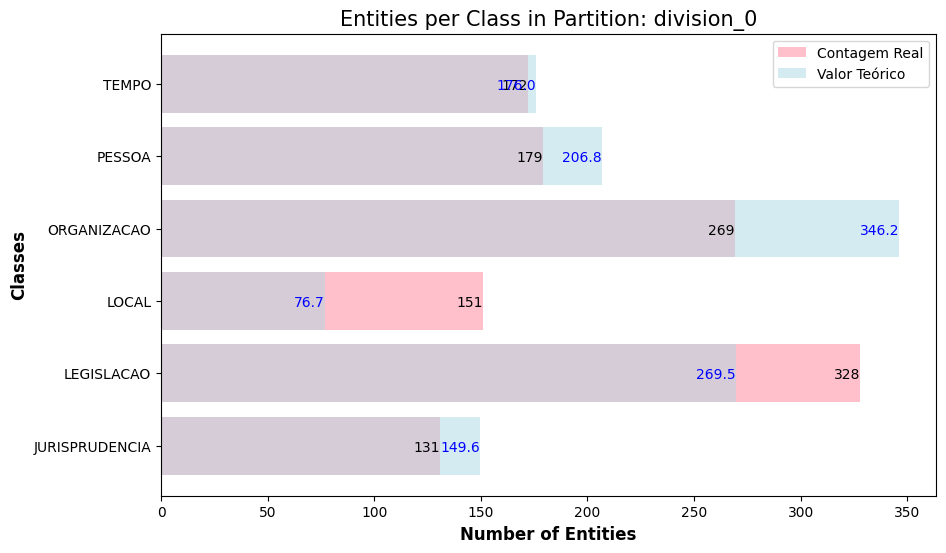

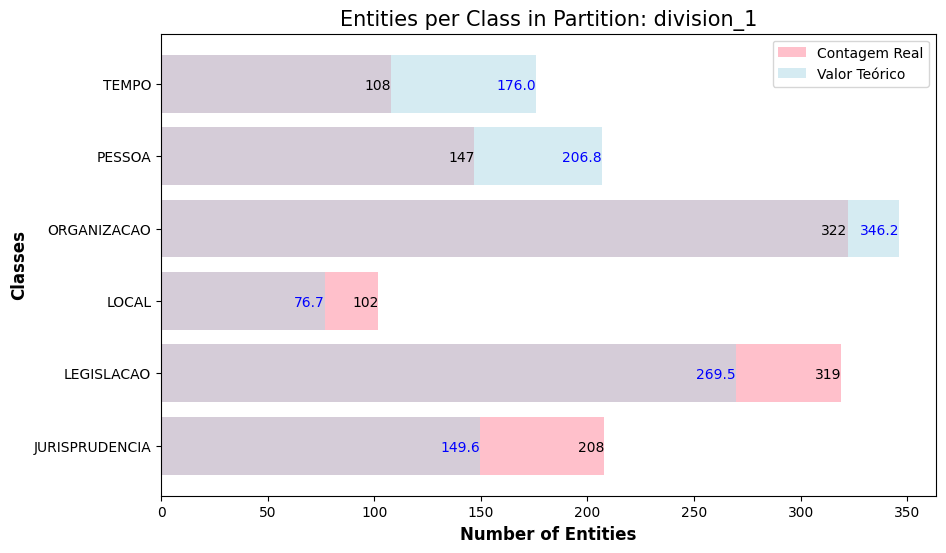

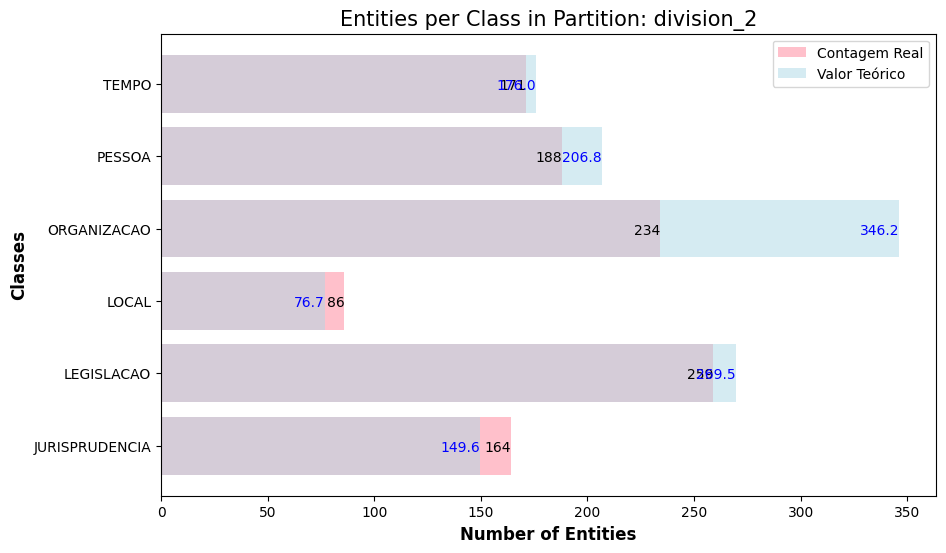

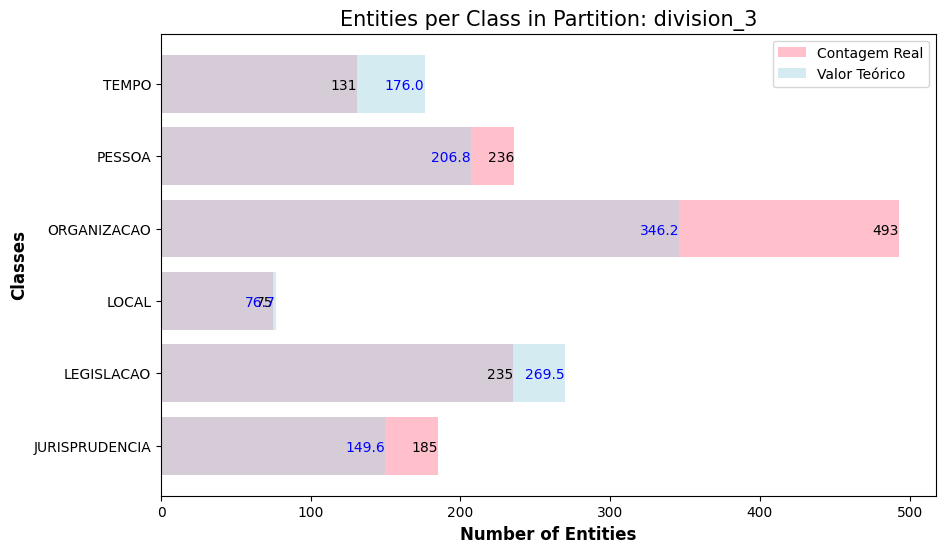

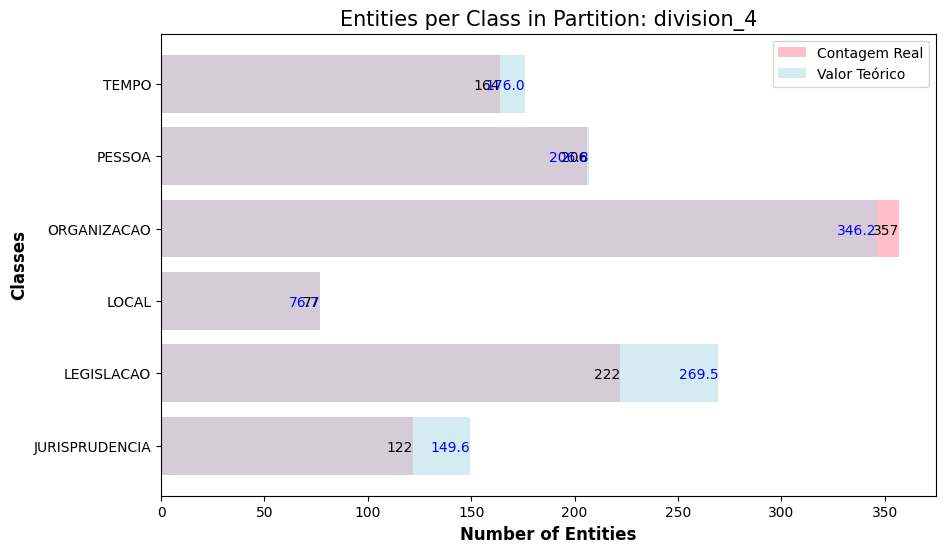

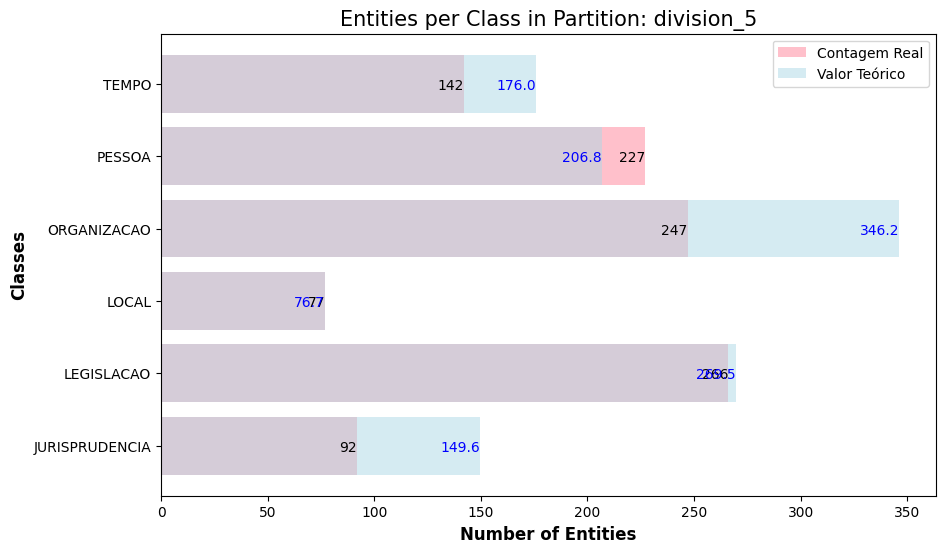

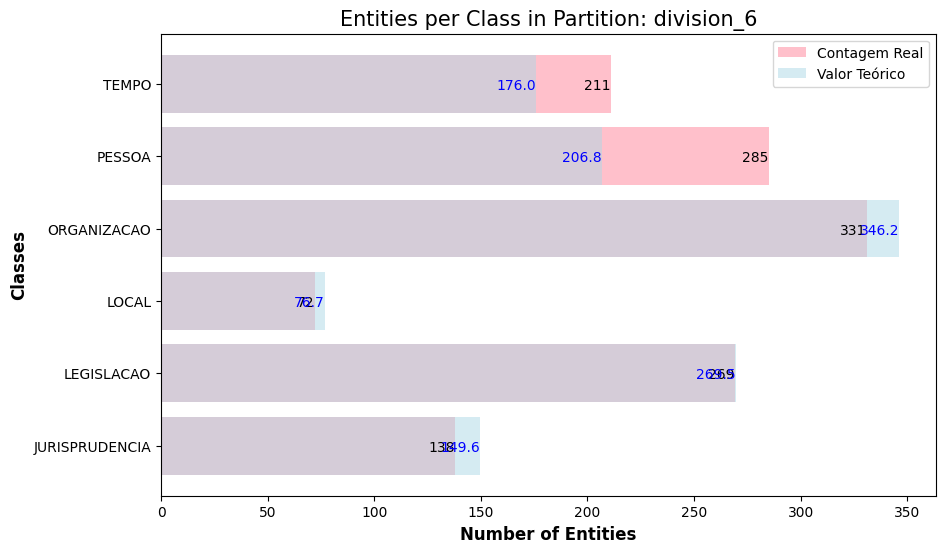

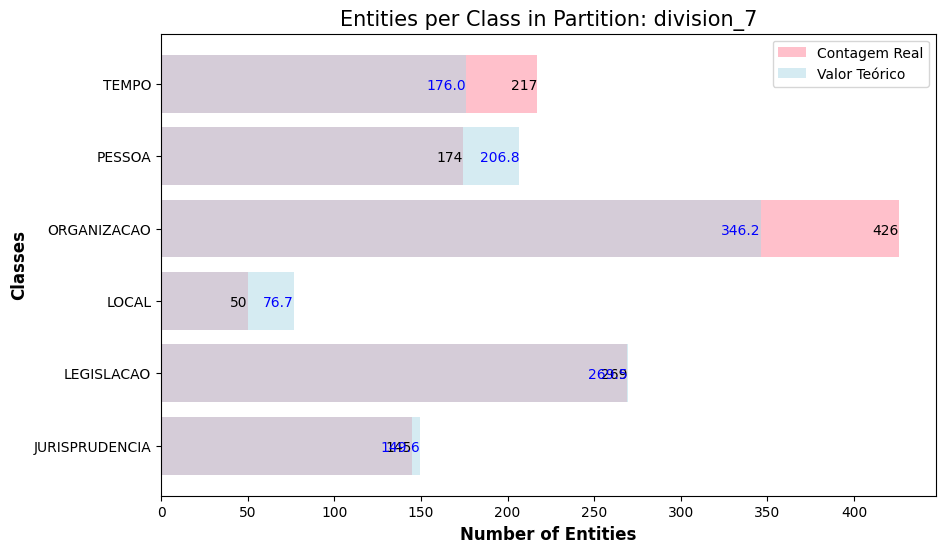

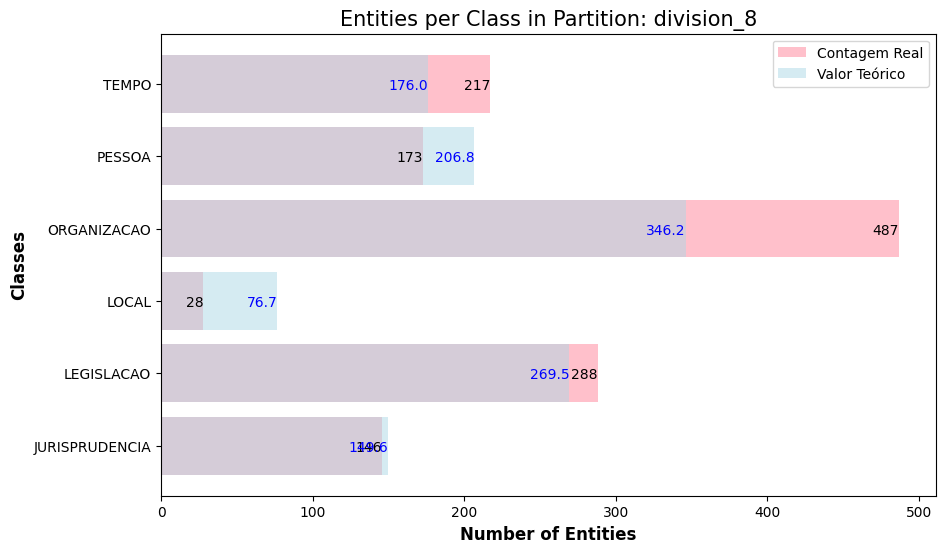

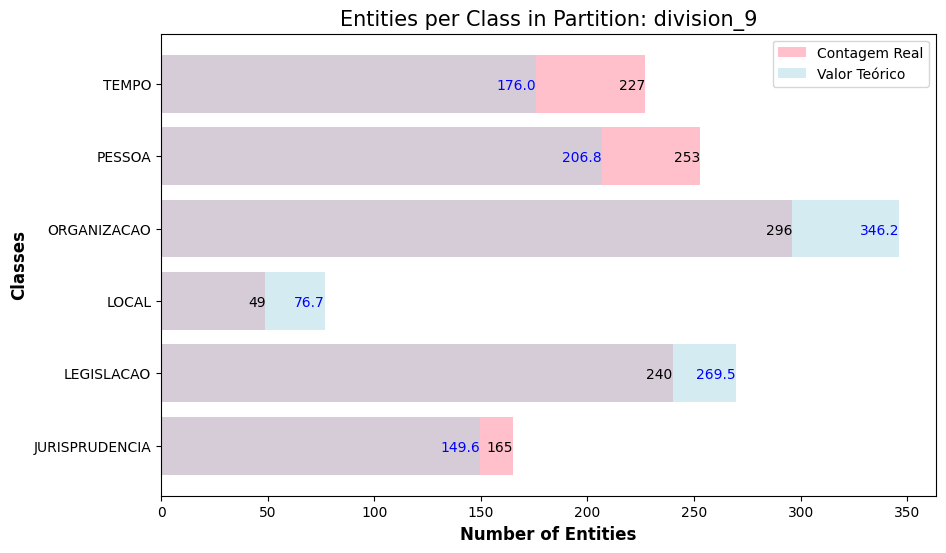

In [33]:
import os
from collections import Counter
import matplotlib.pyplot as plt
import re

# Diretório onde as partições estão salvas
base_dir = "../Base de Dados/leNER/divisions/iterative/"

number_divisions = 10

# Inicializar lista para as classes teóricas
unique_lbl_list = []

# Lista de abreviações
abbreviations = r"\b(?:Sr|S|Sra|Dr|Prof|Eng|Mme|Mestre|Vº|Vª)\.$"  # Abreviações que não devem terminar uma sentença
pattern = r"[.!?](\s|$)"  # Verifica ponto, exclamação ou interrogação seguidos de espaço ou fim da linha

# Contadores gerais
total_counts = Counter()
total_sentences_por_div = {}
total_tokens_por_div = {}

for file_name in sorted(os.listdir(base_dir)):
    if file_name.startswith("division_"):
        partition_path = os.path.join(base_dir, file_name)
        with open(partition_path, 'r', encoding='utf-8') as file:
            sentence_count = 0
            token_count = 0
            for line in file:
                line = line.strip()
                if line:
                    token_data = line.split()
                    label = token_data[-1]
                    token_count += 1  # Contando tokens
                    if label.startswith("B-"):  # Considerar apenas os rótulos com prefixo 'B-'
                        simplified_label = label.split("-")[-1]
                        unique_lbl_list.append(simplified_label)
                        total_counts[simplified_label] += 1
                    
                    # Verificar se a linha termina com ponto, exclamação ou interrogação
                    # e garantir que não seja uma abreviação
                    if re.search(pattern, line) and not re.search(abbreviations, line):
                        sentence_count += 1
            
            total_sentences_por_div[file_name] = sentence_count
            total_tokens_por_div[file_name] = token_count

# Obter classes teóricas únicas e ordenadas
classes_teoricas = sorted(set(unique_lbl_list))

# Calcular os valores teóricos dividindo as contagens totais por número de divisões
valores_teoricos = [total_counts[cls] / number_divisions for cls in classes_teoricas]

# Inicializando dicionários para armazenar contagens por partição
qtd_classes_por_div = {}
total_entidades_por_div = {}

# Iterar novamente pelas partições para calcular os valores reais
for file_name in sorted(os.listdir(base_dir)):
    if file_name.startswith("division_"):
        partition_path = os.path.join(base_dir, file_name)

        # Inicializar contador para esta partição
        labels_count = Counter()

        with open(partition_path, 'r', encoding='utf-8') as file:
            for line in file:
                line = line.strip()
                if line:
                    token_data = line.split()
                    label = token_data[-1]
                    if label.startswith("B-"):  # Considerar apenas os rótulos com prefixo 'B-'
                        simplified_label = label.split("-")[-1]
                        labels_count[simplified_label] += 1

        # Armazenar as contagens para a partição atual
        qtd_classes_por_div[file_name] = labels_count
        total_entidades_por_div[file_name] = sum(labels_count.values())

# Calculando o total geral de todas as partições
total_entidades_geral = sum(total_entidades_por_div.values())
total_sentences_geral = sum(total_sentences_por_div.values())
total_tokens_geral = sum(total_tokens_por_div.values())

# Exibindo os totais por partição e o total geral
print("Totais de entidades, sentenças e tokens por partição:")
for div_name in total_entidades_por_div:
    print(f"  {div_name}: {total_entidades_por_div[div_name]} entidades, "
          f"{total_sentences_por_div[div_name]} sentenças, "
          f"{total_tokens_por_div[div_name]} tokens")
print(f"\nTotal geral de entidades: {total_entidades_geral}")
print(f"Total geral de sentenças: {total_sentences_geral}")
print(f"Total geral de tokens: {total_tokens_geral}\n")

# Gerando os gráficos para cada partição
for div_name, labels_count in qtd_classes_por_div.items():
    # Ordenar as contagens conforme as classes teóricas
    qtd = [labels_count.get(cls, 0) for cls in classes_teoricas]

    plt.figure(figsize=(10, 6))
    bars_real = plt.barh(classes_teoricas, qtd, color="pink", label="Contagem Real")
    bars_teorico = plt.barh(classes_teoricas, valores_teoricos, color="lightblue", alpha=0.5, label="Valor Teórico")

    # Adicionando os valores nas barras
    for i, count in enumerate(qtd):
        plt.text(count, i, str(count), va="center_baseline", ha="right", fontsize=10)

    for i, teorico in enumerate(valores_teoricos):
        if teorico > 0:
            plt.text(teorico, i, f"{teorico:.1f}", va="center_baseline", ha="right", fontsize=10, color="blue")

    plt.title(f"Entities per Class in Partition: {div_name}", fontsize=15)
    plt.xlabel("Number of Entities", fontweight="bold", fontsize=12)
    plt.ylabel("Classes", fontweight="bold", fontsize=12)

    plt.legend()

    # Salvando o gráfico
    output_path = os.path.join(base_dir, f"entities_per_class_{div_name}.png")
    plt.savefig(output_path, dpi=300, format="png", bbox_inches="tight")
    print(f"Gráfico salvo: {output_path}")

print("Todos os gráficos foram gerados e salvos com sucesso!")
